# H1N1 training problem

## Problem description

The problem aims at predicting the probability of an american citizen being vaccinated to H1N1 given some data.

# Load datasets

In [1]:
import numpy as np
import pandas as pd

Let's begin by loading the training data:

In [2]:
features_df = pd.read_csv('training_set_features.csv', index_col='respondent_id')
labels_df = pd.read_csv('training_set_labels.csv', index_col='respondent_id')

Let's explore the features:

In [3]:
print('features_df.shape', features_df.shape)
features_df.head()

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


Each row corresponds to a survey respondent. The columns provide feature values corresponding to the answers provided by those people. We have 26707 observations and 35 features.

Let's explore the data types:

In [4]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

Now let's look at the labels:

In [5]:
print('labels_df.shape', labels_df.shape)
labels_df.head()

labels_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


We have the same 26707 observations, and two target variables for which we have labels.

Let's double check that the rows between features and labels match up. We don't want to have the wrong labels. Nympy's "assert_array_equal" will error if the two arrays - the row indices of the two data frames - don't match up.

In [6]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

The assertion ran and nothing happened, which means there is no problem. If the two index arrays were not the same, there would be an error.

# Exploring the data

In [7]:
import matplotlib.pyplot as plt

### Labels

Let's start by taking a look at the distribution of the two target variables.

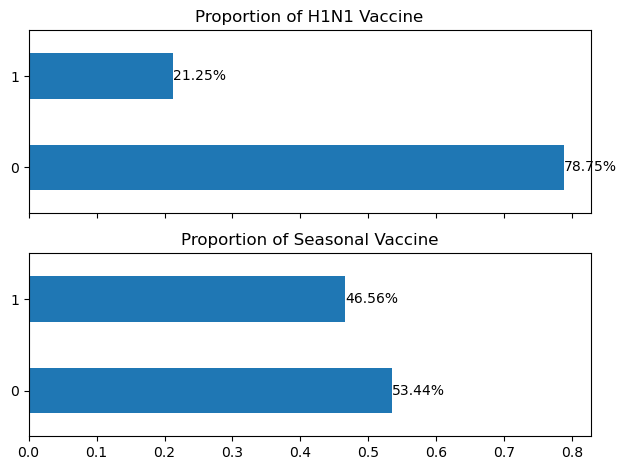

In [8]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

labels_df['h1n1_vaccine'].value_counts().div(n_obs).plot.barh(title='Proportion of H1N1 Vaccine', ax=ax[0])
for index, value in enumerate(labels_df['h1n1_vaccine'].value_counts().div(n_obs)):
    ax[0].text(value, index, f'{value:.2%}',va='center')

labels_df['seasonal_vaccine'].value_counts().div(n_obs).plot.barh(title='Proportion of Seasonal Vaccine', ax=ax[1])
for index, value in enumerate(labels_df['seasonal_vaccine'].value_counts().div(n_obs)):
    ax[1].text(value, index, f'{value:.2%}',va='center')

fig.tight_layout()

It looks like roughly half of people received the seasonal flu vaccine, but only about 20% of people received the H1N1 vaccine. In terms of class balance, we say that the seasonal flu vaccine target has balanced classes, but the H1N1 vaccine target has moderately imbalanced classes.

Let's take a look whether the two target variables are independent. The pandas crosstab method computes a simple crosstab tabulation of two or more factors.

In [9]:
pd.crosstab(labels_df['h1n1_vaccine'], labels_df['seasonal_vaccine'], margins=True, normalize=True)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


#### The $\phi$ coefficient

The $\phi$ coefficient is a measure of association for two binary variables. Let $X$ and $Y$ be two variables. Let $n_{ij}$ be the number of observations where $x=i$ and $y=j$. Let $N_{\_j}$ be the sum of occurances where $y=j$ and $N_{i\_}$ be the sum of occurances where $x=i$. Let $N$ be the total number of occurances. Then,
\begin{equation}
N_{i\_} = n_{ii} + n_{ij}
\end{equation}
and
\begin{equation}
N_{\_j} = n_{ij} + n_{jj}
\end{equation}
This yields
\begin{equation}
    N_{0\_} = n_{00} + n_{01}
\end{equation}
\begin{equation}
    N_{1\_} = n_{10} + n_{11}
\end{equation}
\begin{equation}
    N_{\_0} = n_{00} + n_{10}
\end{equation}
\begin{equation}
    N_{\_1} = n_{01} + n_{11}
\end{equation}
and
\begin{equation}
    N = N_{\_0} + N_{\_1} = N_{0\_} + N_{1\_}
\end{equation}

These values can be arranged in a table such as:

\begin{array}{l|c|c|c}
      & y=1    &  y=0   & Total  \\ \hline
x=1   & n_{11} & n_{10} & N_{1\_} \\ \hline
x=0   & n_{01} & n_{00} & N_{0\_} \\ \hline
Total & N_{\_1} & N_{\_0} & N
\end{array}

The $\phi$ coefficient that describes the association of $x$ and $y$ is

\begin{equation}
    \phi = \frac{n_{11}n_{00} - n_{10}n_{01}}{\sqrt{N_{1\_}N_{\_1}N_{0\_}N_{\_0}}}
\end{equation}

#### The Pearson correlation coefficient

Pearson's correlation coefficient, when applied to a population, is commonly denoted by $\rho$ and is given by
\begin{equation}
    \rho_{X,Y} = \frac{\mathrm{cov}(X,Y)}{\sigma_X\sigma_Y}
\end{equation}

The covariance of $X$ and $Y$ is given by
\begin{equation}
    \mathrm{cov}(X,Y) = E\{[X - E(X)][Y - E(Y)]\}
\end{equation}

The $\phi$ coefficient is the same as the Pearson coefficient for two binary variables.

Let's calculate the Pearson coefficient to explore correlation between H1N1 vaccine and seasonal vaccine.

In [10]:
labels_df['h1n1_vaccine'].corr(labels_df['seasonal_vaccine'], method='pearson')

0.37714265306144507

This value suggests a moderate positive correlation. This can be seen in the cross-tabulation as well. Most people who got the H1N1 vaccine also got the seasonal flu vaccine. While less than half the people who got the seasonal vaccine got the H1N1 vaccine, they got the latter at a higher rate than those who did not get the seasonal vaccine.

### Features

Let's take a look at our features. From the problem description page, most feature variables are categorical. Let's pick a few and see how vaccination rates may differ across the levels of the features variables.

Let's begin by joining features and lables in a single dataframe.

In [11]:
joined_df = features_df.join(labels_df)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


#### Prototyping a plot

Let's explore how features are correlated with the target variables. We'll start by trying to visualize if there is simple bivariate correlation. If a feature is correlated with a target, we'd expect there to be different patterns of vaccination as you vary the values of the feature.

We shall begin by picking one feature and one target and working our way up to a plot prototype, which shall then be applied to more features and both targets. We'll use h1n1_concern, the level of concern the person showed about the H1N1 flu and h1n1_vaccine as a target variable.

Let's get the count of observations for each combination of those two variables.

In [12]:
counts = joined_df[['h1n1_concern', 'h1n1_vaccine']].groupby(['h1n1_concern', 'h1n1_vaccine']).size().unstack()

counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


Let's put these numbers into a bar chart.

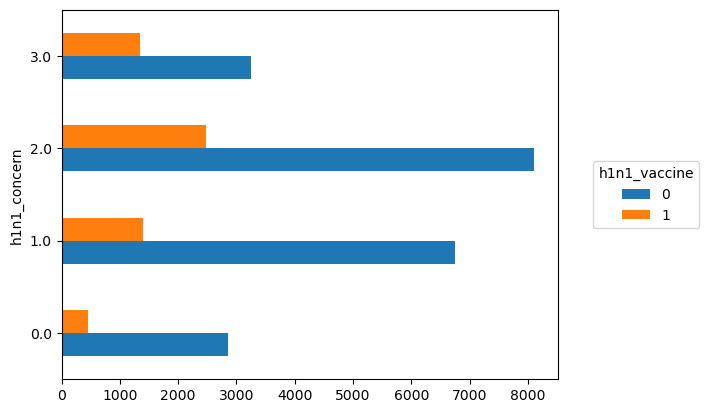

In [13]:
ax = counts.plot.barh()
#ax.invert_yaxis()
ax.legend(
    loc = 'center right',
    bbox_to_anchor = (1.3, 0.5),
    title = 'h1n1_vaccine'
)

This plot is not the best option to show how the vaccinated to non-vaccinated peple ratio changes according to concern level. 

Let's look at the rate of vaccination for each level of H1N1 concern. We shall begin by adding up the numbers on each row of the counts dataframe to find the total number of individuals with each concern level.

In [14]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

Dividing each value on the counts table by the total of each row, we find the fractions of individuals that were and were not vaccinated for each concern level.

In [15]:
props = counts.divide(h1n1_concern_counts, axis='index')

props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


The table shows an increase in vaccination as the level of concern increases. Let's put this in a plot.

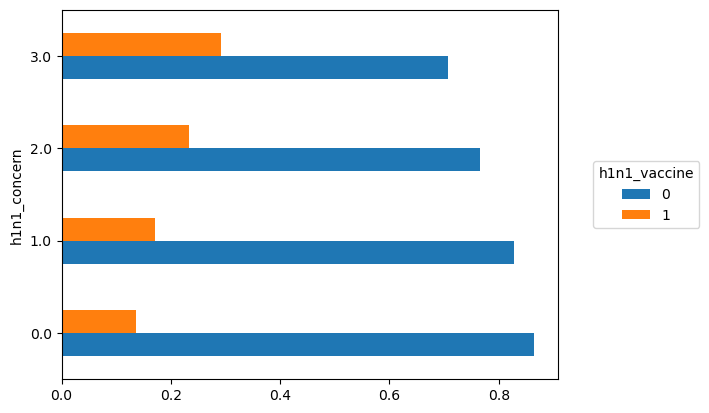

In [16]:
ax = props.plot.barh()
ax.legend(
    loc = 'center right',
    bbox_to_anchor = (1.3, 0.5),
    title = 'h1n1_vaccine'
)

This plot allows a nice visualization of what is happening. As the concern level increases, so does the vaccination rate. This shows that the concern level is a good variable to consider when predicting H1N1 vaccination probability. Since every pair of numbers adds up to 1, this is a good use case for a stacked bar chart.

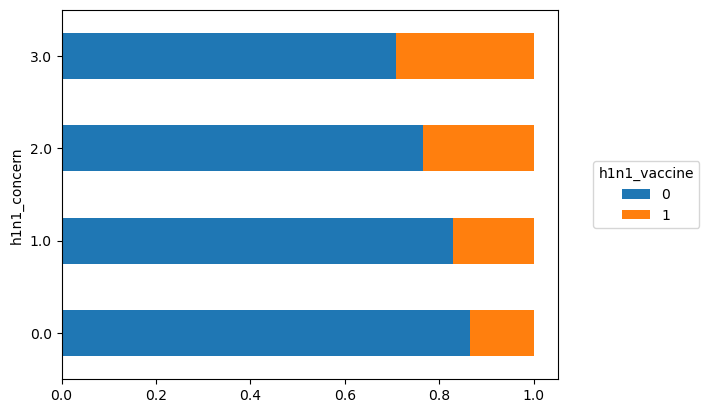

In [17]:
ax = props.plot.barh(stacked=True)
ax.legend(
    loc = 'center right',
    bbox_to_anchor = (1.3, 0.5),
    title = 'h1n1_vaccine'
)

#### Plotting more variables

Let's factor this plotting code into a function, so we can use it on more variables.

In [18]:
def vaccination_rate_plot(feature, target, data, ax=None):
    
    counts = data[[feature, target]].groupby([feature, target]).size().unstack()
    
    group_counts = counts.sum(axis='columns')
    props = counts.divide(group_counts, axis='index')
    
    props.plot.barh(stacked=True, ax=ax)
    
    ax.legend().remove()

We'll now loop through several columns and plot agains both h1n1_vaccine and seasonal_vaccine.

In [19]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

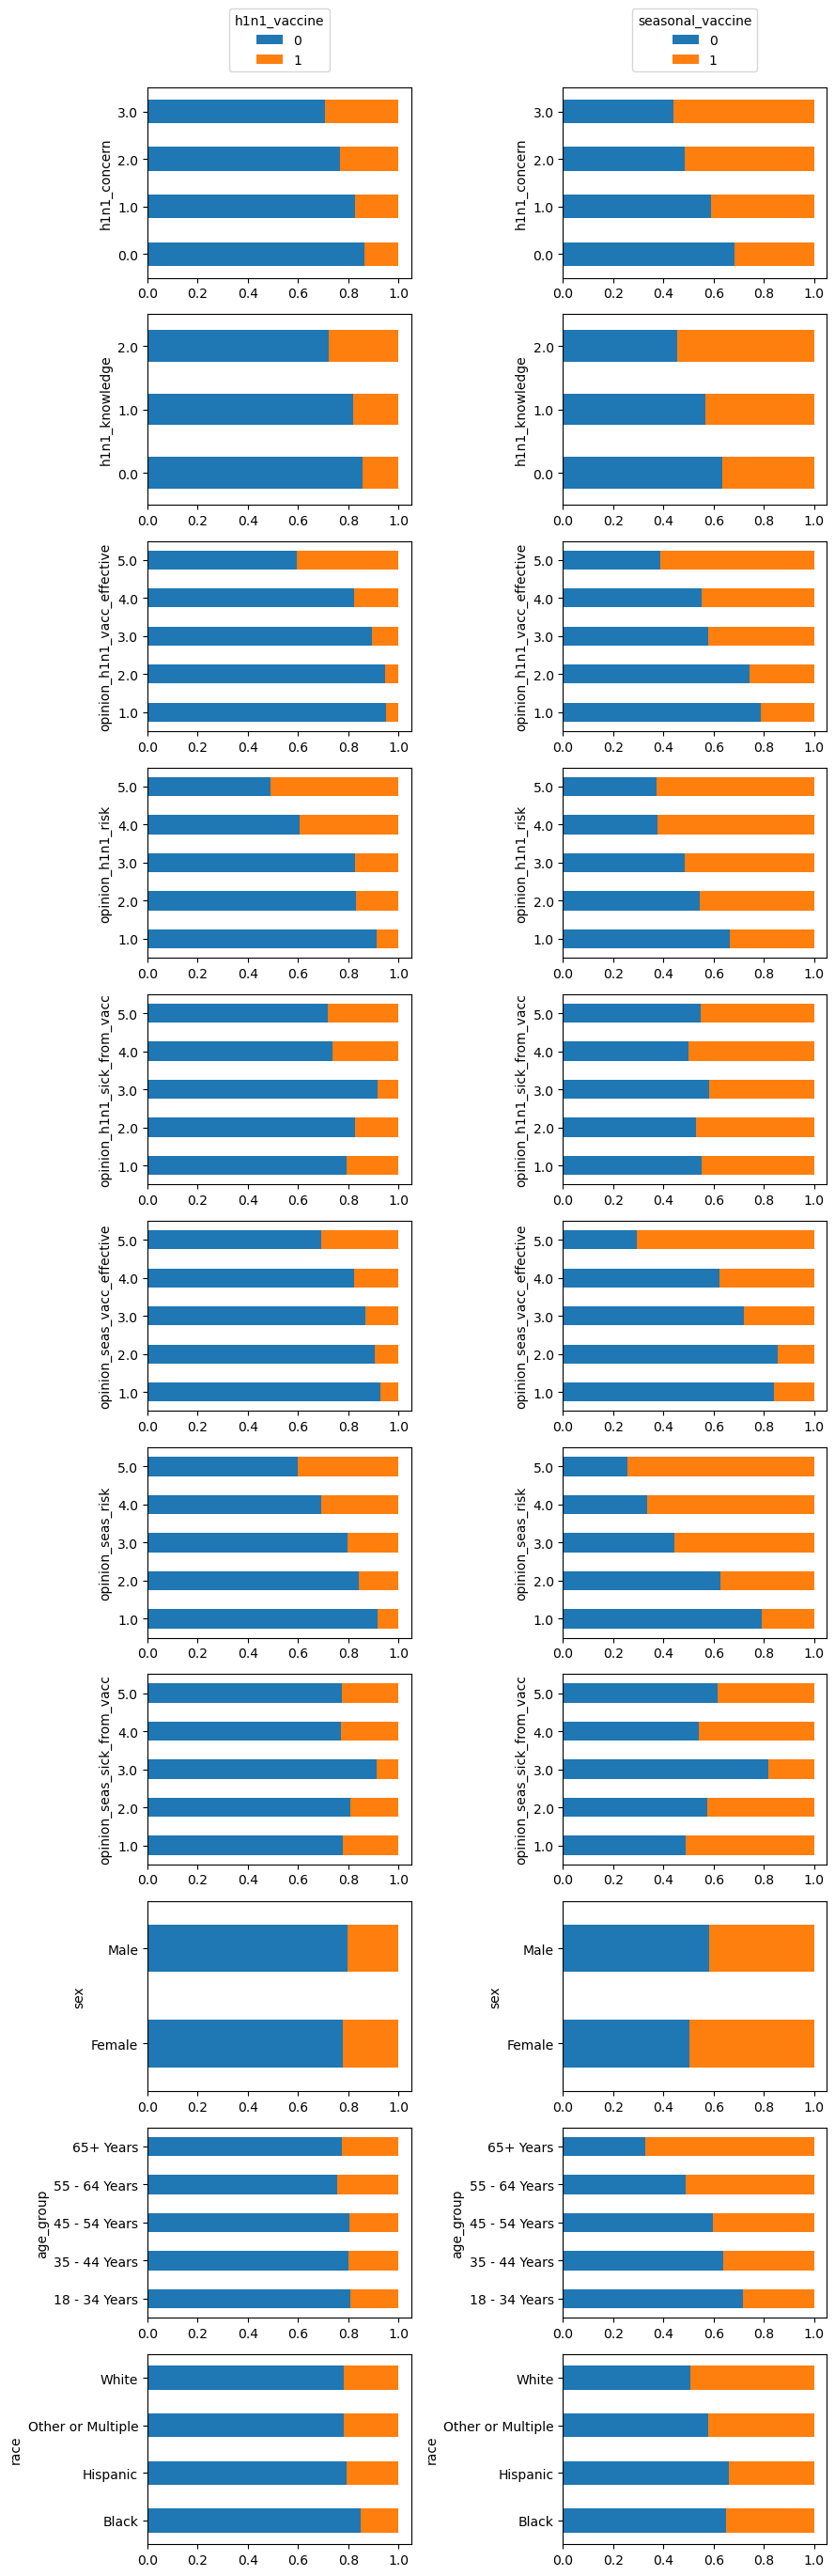

In [20]:
fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)

for index, col in enumerate(cols_to_plot):
    vaccination_rate_plot(col, 'h1n1_vaccine', joined_df, ax[index,0])
    vaccination_rate_plot(col, 'seasonal_vaccine', joined_df, ax[index,1])

ax[0,0].legend(loc='lower center', bbox_to_anchor=(0.5,1.05), title='h1n1_vaccine')
ax[0,1].legend(loc='lower center', bbox_to_anchor=(0.5,1.05), title='seasonal_vaccine')
fig.tight_layout()

Visual inspection shows that knowledge and concern variables are important. Age group has an important correlation with seasonal vaccine, but not with the H1N1 vaccine.

# Building some models

Let's start by performing a logistic regression, which is a simple approach for a binary classification problem.

In [34]:
import sklearn

Let's use Scikit-learn's logistic regression.

Standard logistic regression only works with numeric inputs for features. At first, we'll use only the numeric data. Later, we'll use one-hot encoding for the other variables.

In [35]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

As we can see, some variables are numeric, while others are objects. Let's select the columns that refer to numeric variables.

In [36]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


Let's plot some histograms

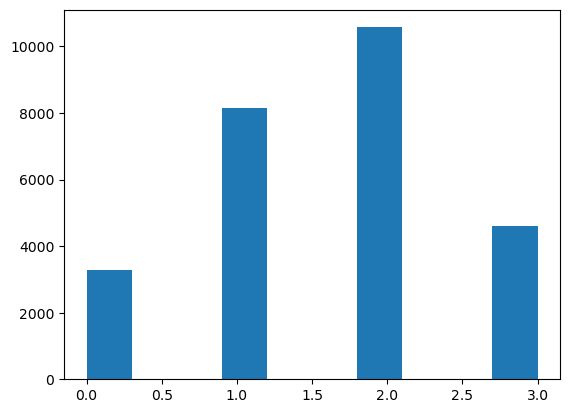

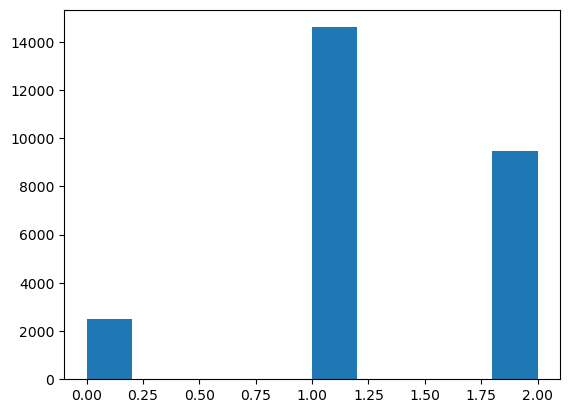

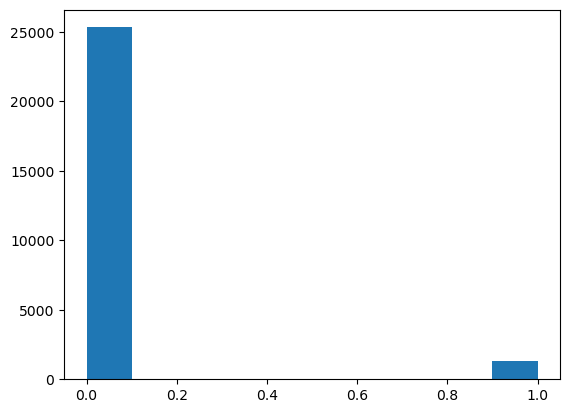

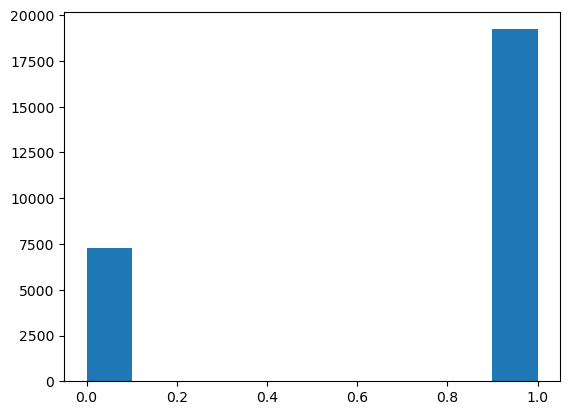

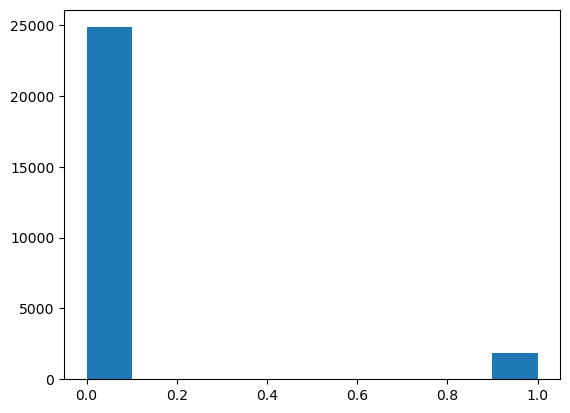

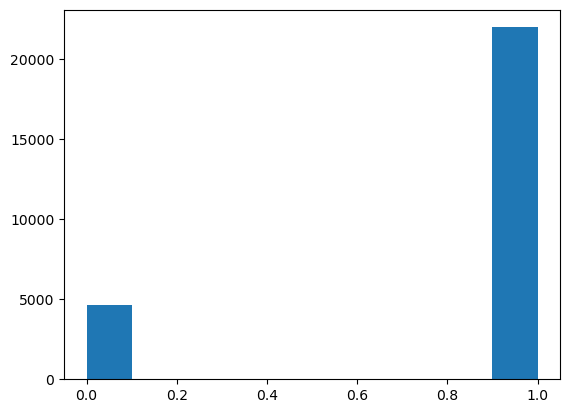

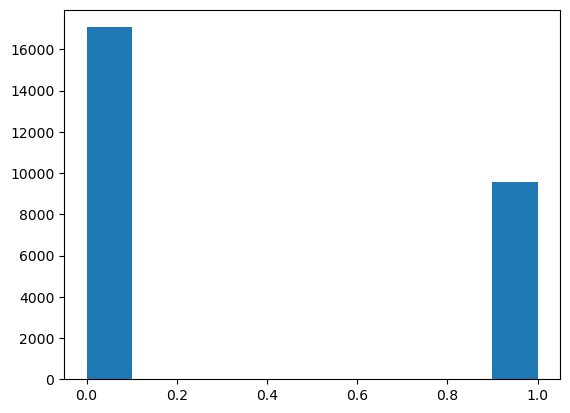

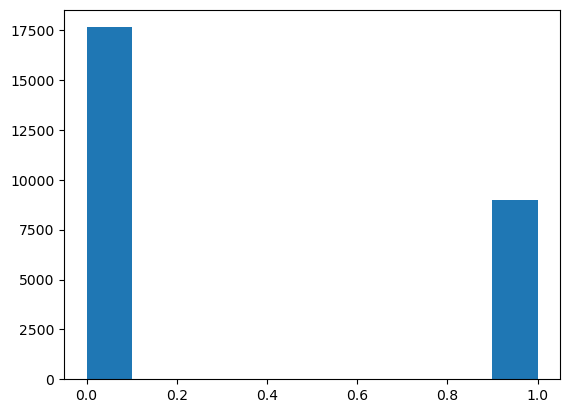

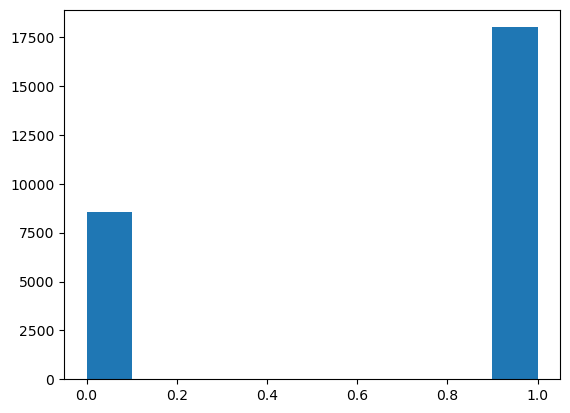

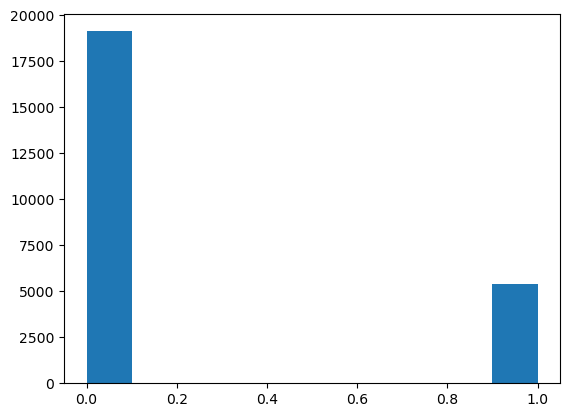

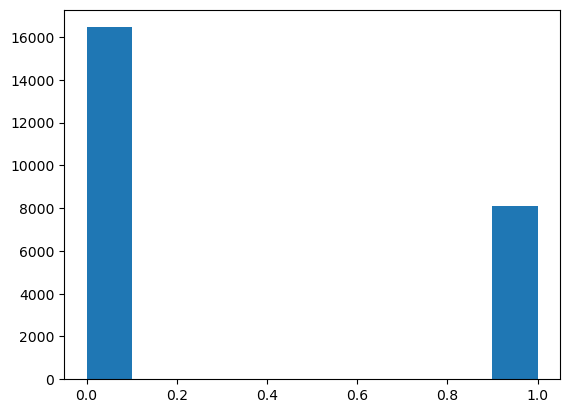

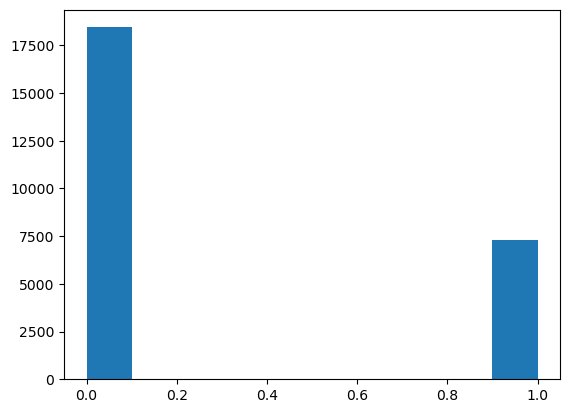

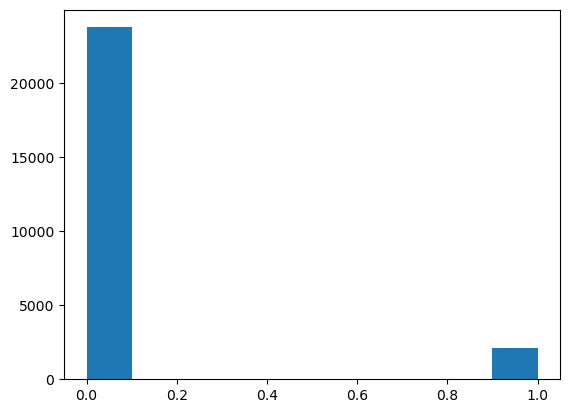

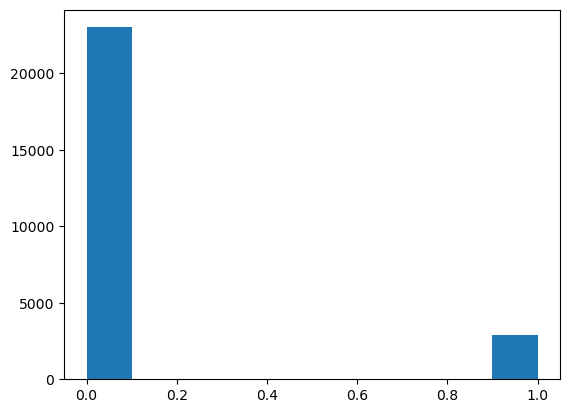

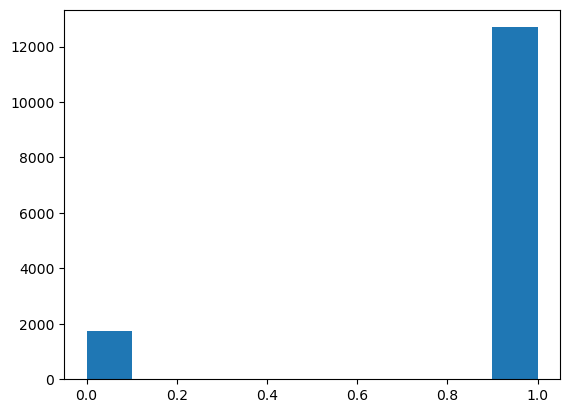

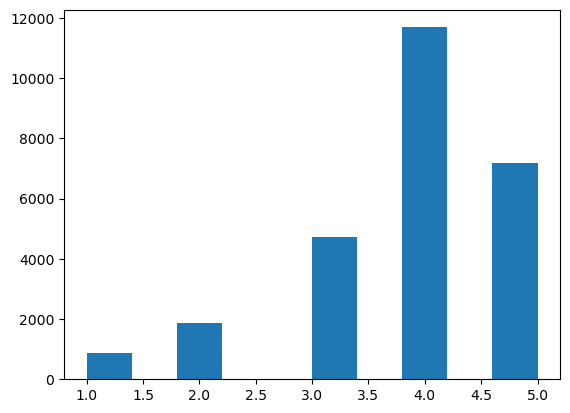

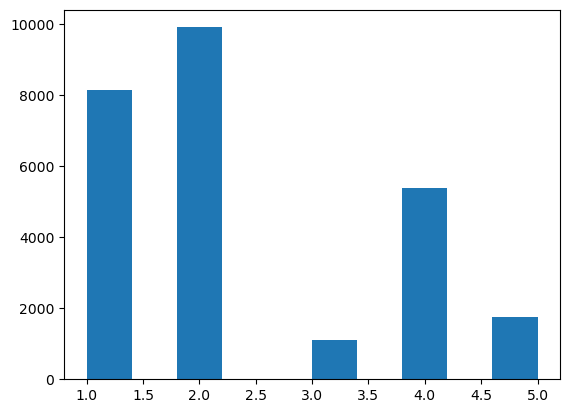

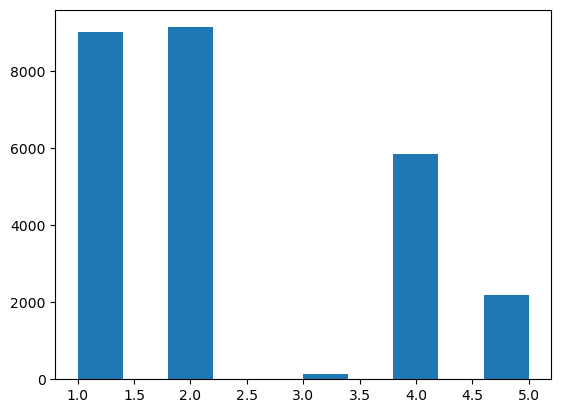

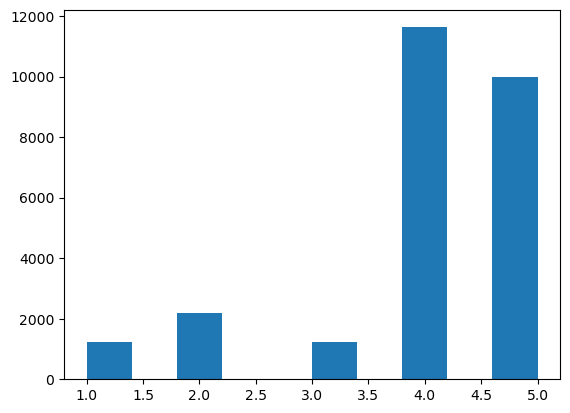

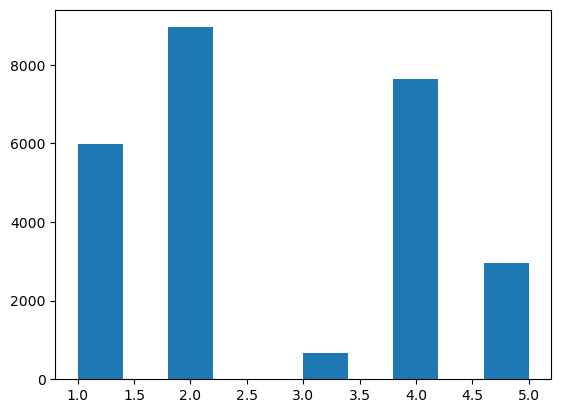

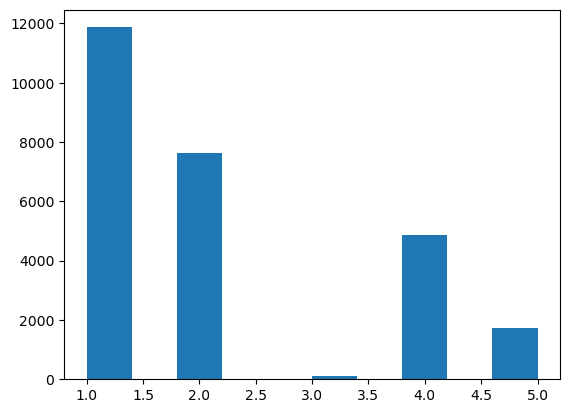

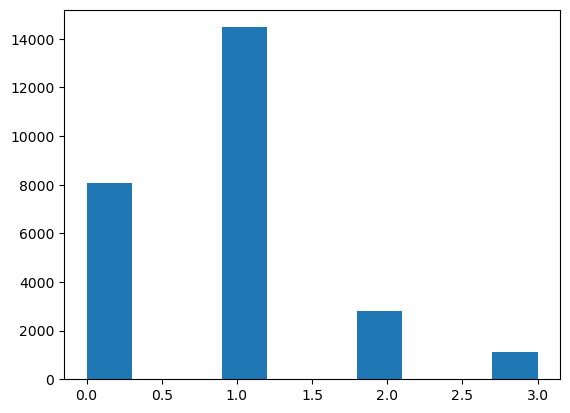

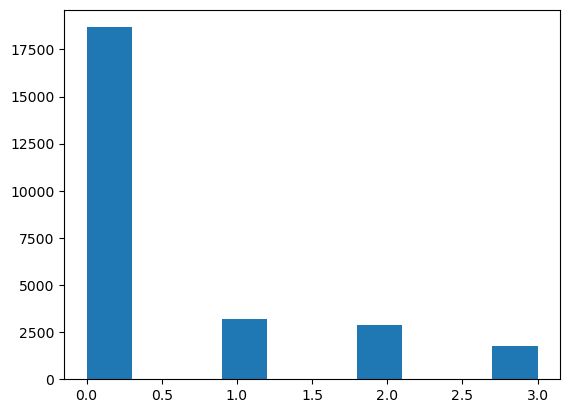

In [37]:
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x)
    plt.show()

for item in numeric_cols:
    plot_histogram(features_df[item])

As we can see from the histograms, variables have different means and variances. Let's scale them so they all have zero mean and unit variance. There are missing values as well. Let's use imputing to fill in the missing values with the variable's median.

Let's create a pipeline where we implement the sklearn's StandardScalar.

In [39]:
# Chain preprocessing into a Pipeline object
# Each step is a tuple of (name, transformer)

numeric_preprocessing_steps = sklearn.pipeline.Pipeline([
    ('standard_scaler', sklearn.preprocessing.StandardScaler()),
    ('simple_imputer', sklearn.impute.SimpleImputer(strategy='median'))
])